In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [62]:
data=pd.read_csv('Historical Product Demand.csv')  
data.head(8)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500


In [63]:
#data['Order_Demand'] = data['Order_Demand'].str.replace(r'\D', '', regex=True)

# Convert the cleaned values to numeric, with errors coerced to NaN
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'], errors='coerce')
#data['Product_Category '] = pd.to_numeric(data['Order_Demand'], errors='coerce')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Product_Code      1048575 non-null  object 
 1   Warehouse         1048575 non-null  object 
 2   Product_Category  1048575 non-null  object 
 3   Date              1037336 non-null  object 
 4   Order_Demand      1038106 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [65]:
data['Date']= pd.to_datetime(data['Date'])
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000.0
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1.0
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500.0
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50.0


In [66]:
data['Date'].dt.to_period('M')

0          2012-07
1          2012-01
2          2012-02
3          2012-02
4          2012-03
            ...   
1048570    2016-04
1048571    2016-04
1048572    2016-04
1048573    2016-10
1048574    2016-06
Name: Date, Length: 1048575, dtype: period[M]

In [67]:
data['Month'] = pd.to_datetime(data['Date']).dt.month
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Month
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,7.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,1.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,3.0
...,...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000.0,4.0
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1.0,4.0
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500.0,4.0
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50.0,10.0


In [68]:
data = data.dropna()

In [69]:
data['Month'] = data['Month'].astype(int)

C:\Users\jhala\AppData\Local\Temp\ipykernel_17240\1523112826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Month'].astype(int)


C:\Users\jhala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


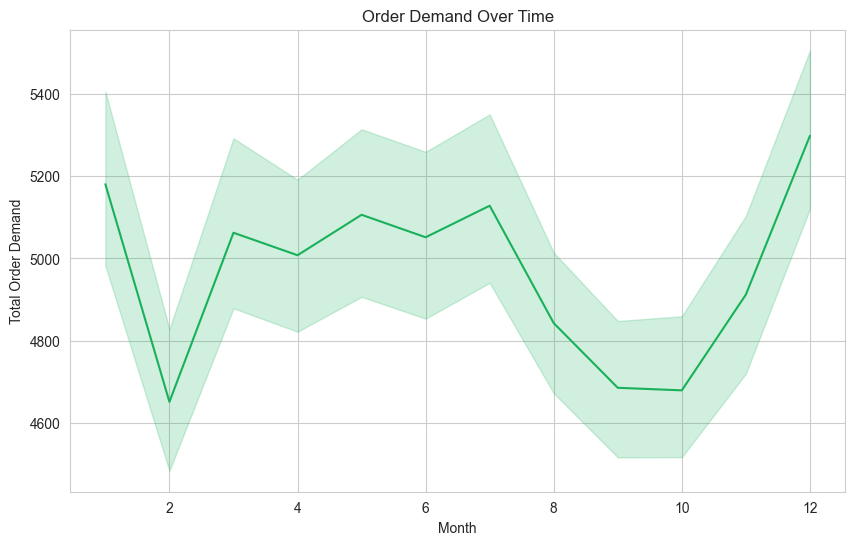

C:\Users\jhala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jhala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

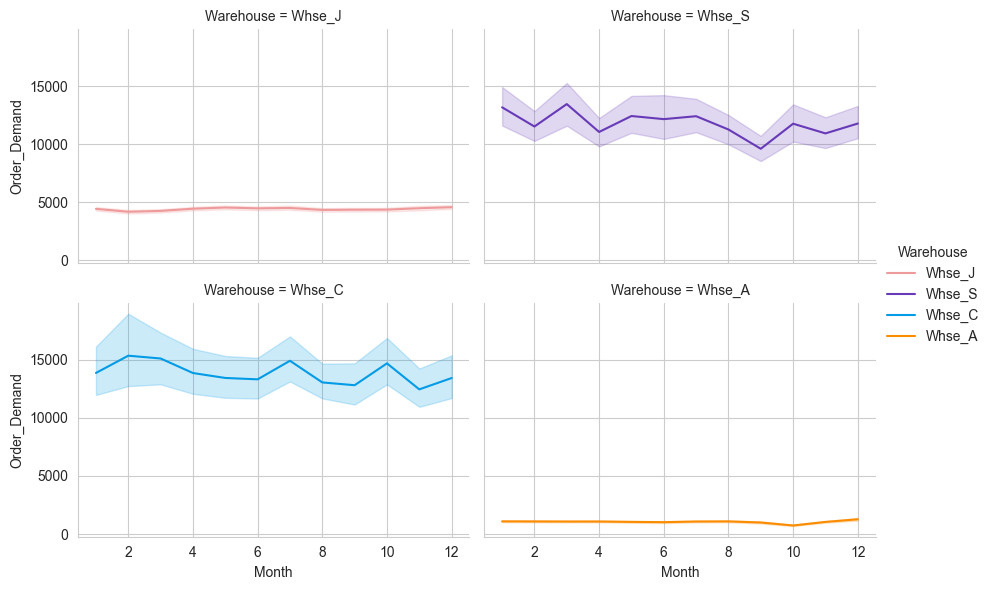

In [70]:
sns.set_style("whitegrid") #Set tje style
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='Order_Demand', color = '#18B15A')
plt.title('Order Demand Over Time')
plt.xlabel('Month')
plt.ylabel('Total Order Demand')
plt.show()


g = sns.relplot(data=data, 
                x='Month', 
                y='Order_Demand', 
                kind="line",
                hue='Warehouse',
                palette=["#EF9A9A", "#673AB7", "#039BE5", "#FB8C00"],
                col='Warehouse',  # Facet by 'Warehouse'
                col_wrap=2,  
                height=3, aspect=1.5)
plt.show()

In [71]:
result=data.groupby(['Month','Product_Category'])['Order_Demand'].sum().reset_index()
print(result)

     Month Product_Category  Order_Demand
0        1     Category_001      137541.0
1        1     Category_002          41.0
2        1     Category_003       27167.0
3        1     Category_004        6855.0
4        1     Category_005    18049765.0
..     ...              ...           ...
384     12     Category_029        1846.0
385     12     Category_030     3641856.0
386     12     Category_031         700.0
387     12     Category_032      493472.0
388     12     Category_033     3620000.0

[389 rows x 3 columns]


In [72]:
result['Product_Category_Code'] = pd.factorize(result['Product_Category'])[0] + 1

In [73]:
result.head(7)

,Month,Product_Category,Order_Demand,Product_Category_Code
0,1,Category_001,137541.0,1
1,1,Category_002,41.0,2
2,1,Category_003,27167.0,3
3,1,Category_004,6855.0,4
4,1,Category_005,18049765.0,5
5,1,Category_006,33054456.0,6
6,1,Category_007,10588466.0,7


In [74]:
result.tail()

,Month,Product_Category,Order_Demand,Product_Category_Code
384,12,Category_029,1846.0,28
385,12,Category_030,3641856.0,29
386,12,Category_031,700.0,30
387,12,Category_032,493472.0,31
388,12,Category_033,3620000.0,32


In [75]:
data['Month'].isna().sum()

0

In [76]:
#result['Product_Category'] = pd.to_numeric(result['Product_Category'], errors='coerce')

In [77]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  389 non-null    int32  
 1   Product_Category       389 non-null    object 
 2   Order_Demand           389 non-null    float64
 3   Product_Category_Code  389 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 10.8+ KB


In [78]:
X=result.drop(labels=["Order_Demand","Product_Category"],axis=1)
y=result["Order_Demand"]

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [80]:
X_train

,Month,Product_Category_Code
51,2,19
144,5,33
355,11,32
110,4,13
379,12,23
...,...,...
165,6,4
105,4,8
232,8,7
360,12,5


In [81]:
y_train

51        95354.0
144         326.0
355     3590000.0
110       21324.0
379       76832.0
          ...    
165       10640.0
105        1827.0
232    10761483.0
360    17455270.0
334       12268.0
Name: Order_Demand, Length: 350, dtype: float64

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [83]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.34987926,  0.23522697],
       [-0.47603634,  1.71293485],
       [ 1.27164951,  1.60738428],
       [-0.76731731, -0.39807641],
       [ 1.56293049,  0.65742922],
       [-1.34987926, -1.66468316],
       [-1.64116023, -1.34803147],
       [ 0.10652561,  0.34077753],
       [-0.18475536,  1.07963147],
       [ 0.98036854, -1.34803147],
       [ 1.27164951,  1.39628316],
       [-0.18475536,  0.55187866],
       [ 0.98036854, -0.29252585],
       [-1.05859829,  1.60738428],
       [-0.76731731,  0.55187866],
       [ 0.98036854, -0.18697528],
       [ 1.27164951, -0.92582922],
       [-0.18475536, -0.82027866],
       [ 1.56293049,  1.60738428],
       [ 1.27164951,  0.23522697],
       [ 0.68908756, -1.03137978],
       [ 0.68908756, -0.82027866],
       [-1.05859829,  1.18518203],
       [ 0.39780659, -0.82027866],
       [-1.05859829, -0.92582922],
       [-0.76731731, -0.08142472],
       [-1.05859829, -1.13693035],
       [ 0.98036854, -0.50362697],
       [ 0.98036854,

In [84]:
X_test = scaler.transform(X_test)
X_test

array([[-1.64116023,  0.12967641],
       [-0.47603634, -1.45358203],
       [-1.64116023, -0.08142472],
       [-1.34987926,  0.65742922],
       [-1.64116023,  0.02412584],
       [-1.64116023, -1.45358203],
       [-0.76731731, -1.34803147],
       [ 0.10652561, -0.82027866],
       [-1.34987926,  1.07963147],
       [ 0.68908756, -0.29252585],
       [-1.64116023,  1.60738428],
       [-1.34987926,  0.12967641],
       [ 0.98036854, -1.03137978],
       [ 0.39780659,  0.12967641],
       [-1.34987926,  1.2907326 ],
       [ 1.27164951, -1.5591326 ],
       [ 0.68908756, -0.39807641],
       [ 0.39780659, -1.34803147],
       [-0.76731731,  1.50183372],
       [-0.18475536,  1.2907326 ],
       [-0.47603634, -0.82027866],
       [ 0.68908756, -0.18697528],
       [ 1.56293049,  0.86853034],
       [ 0.10652561, -1.24248091],
       [ 0.98036854,  0.55187866],
       [-0.47603634,  0.23522697],
       [-0.47603634,  1.60738428],
       [ 0.10652561, -0.29252585],
       [ 0.10652561,

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from xgboost import XGBRegressor

In [86]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

In [87]:
r2_list=[]
acc_list=[]

In [88]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest']

In [89]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest'])

In [90]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    acc=accuracy_score(true,pred)

    return mae, mse,r2,acc

In [91]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    


    print("model training performance",model)
    print("MSE:", mse)
    print("MAE:",mae)
    print("R2 SCORE:",r2)
    

    r2_list.append(r2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 8165098806211426.0
MAE: 33664295.01803889
R2 SCORE: -0.04272773137946184


model training performance Lasso()
MSE: 8165098753646587.0
MAE: 33664295.3730878
R2 SCORE: -0.04272772466664465


model training performance Ridge()
MSE: 8164820843539630.0
MAE: 33665734.80558516
R2 SCORE: -0.04269223402749467


model training performance ElasticNet()
MSE: 8133450110491883.0
MAE: 33831009.453777805
R2 SCORE: -0.03868602000866317


model training performance RandomForestRegressor()
MSE: 98990616000346.88
MAE: 2610194.239230768
R2 SCORE: 0.9873583574553471


